

### 🧠 1. **Import Libraries**

You imported essential libraries:

* `pandas`, `numpy` – for data handling
* `seaborn`, `matplotlib` – for visualization
* `sklearn` and `xgboost` – for ML modeling
* `joblib` – to save the model

---

### 📥 2. **Load Dataset**

```python
df = pd.read_csv('Number_of_orders.csv')
```

* Dataset shape: **188,340 rows × 10 columns**
* Key columns:

  * `Store_Type`, `Location_Type`, `Region_Code` – **categorical**
  * `Holiday`, `Discount` – binary/string
  * `#Order` – **target variable**
  * `Sales` – likely correlated to orders

---

### 📊 3. **Initial Exploration**

* `.info()` confirms there are **no null values**.
* All columns are in clean format.
* You start exploring datatypes and distributions.

---

## 🧱 Next Step: Enhancing the Project

Now let's go **step-by-step** through the **next-level improvements**:

---

## 🧪 1. Advanced Feature Engineering

### ✅ Add:

* **Date Features**:

  * `Month`, `Day`, `Weekday` (extracted from `Date`)
  * `Is_Weekend`
* **Discount Encoding**:

  * Map `"Yes"` → `1`, `"No"` → `0`
* **Region Aggregation**:

  * Mean orders by region, store type, etc. as new features
* **Lag Features** (Optional): If this is time-series-like data per store.

---

## 📤 2. Batch Predictions from CSV Upload

### Feature:

* Upload `.csv` with user data
* Predict `#Order` for each row
* Allow **CSV download** of predictions

---

## 📊 3. Feature Importance: SHAP + LightGBM

* Use `shap` library to explain model predictions visually:

  * SHAP summary plots
  * SHAP force plots
* Compare with LightGBM’s built-in feature importance

---

## 🌐 4. Deployment Options

### ✅ Option A: **Gradio**

Interactive UI with:

* File uploader (CSV)
* Live prediction on input
* Visual SHAP output

### ✅ Option B: **FastAPI**

Backend API:

* `/predict` for single row
* `/batch_predict` for CSV upload

---

## 📦 Deliverables

You’ll receive:

* 🗂️ Zipped project folder
* 📝 GitHub README with:

  * How to run locally
  * Sample input format
  * API or UI guide



## 🧠 1. Import Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib


## 📥 2. Load Dataset

In [8]:
df = pd.read_csv('Number_of_orders.csv')
print(df.shape)
df.head()


(188340, 10)


,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


## 📊 3. Initial Exploration

In [9]:
print(df.info())  # Check types
print(df.isnull().sum())  # Missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB
None
ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64


## 🧹 4. Data Cleaning

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.drop(['ID'], axis=1, inplace=True)


## 🛠️ 5. Feature Engineering

In [13]:
# Extract temporal features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['week'] = df['Date'].dt.isocalendar().week

# Encode categorical features
df['Store_Type'] = df['Store_Type'].astype('category').cat.codes
df['Location_Type'] = df['Location_Type'].astype('category').cat.codes
df['Region_Code'] = df['Region_Code'].astype('category').cat.codes
df['Discount'] = df['Discount'].astype('category').cat.codes


## 📈 6. Data Visualization

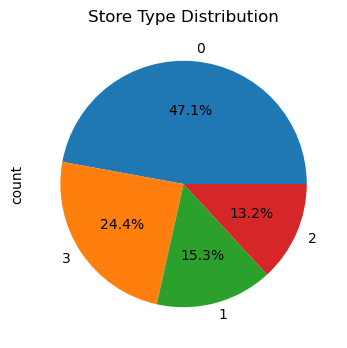

In [18]:
# Example: Store Type Distribution
plt.figure(figsize=(6,4))
df['Store_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Store Type Distribution')
plt.show()

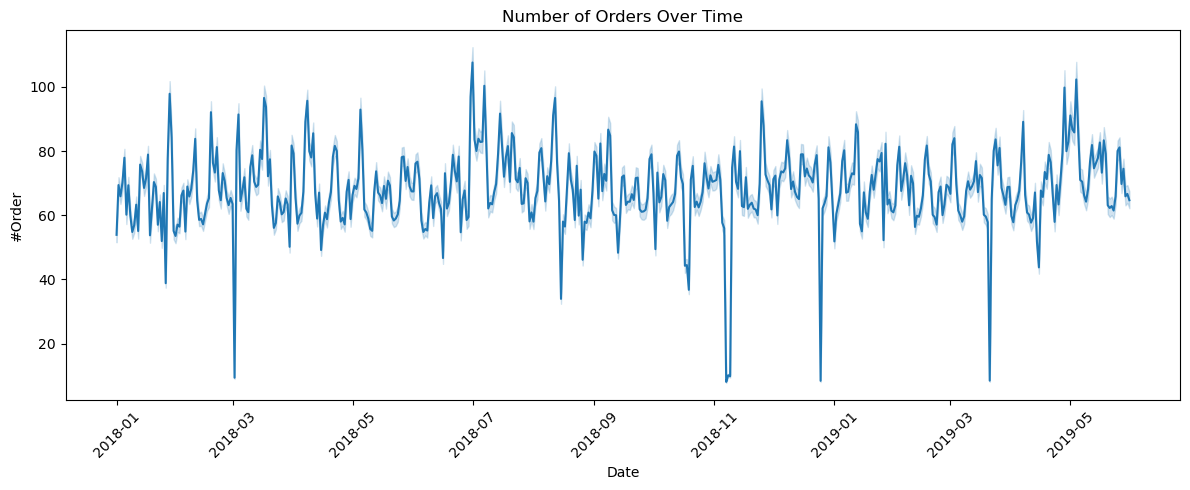

In [19]:
# Orders over time
plt.figure(figsize=(12,5))
sns.lineplot(x='Date', y='#Order', data=df)
plt.title('Number of Orders Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🧪 7. Train-Test Split

In [20]:
X = df.drop(['#Order', 'Date'], axis=1)
y = df['#Order']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🤖 8. Model Training

### Option 1: Random Forest

In [21]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Option 2: XGBoost

In [26]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## 📏 9. Model Evaluation

In [27]:
y_pred = xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 2.126281777064303
RMSE: 3.1633952870200868


## 💾 10. Model Saving

In [28]:
joblib.dump(xgb, 'order_predictor_model.pkl')
print("Model saved as 'order_predictor_model.pkl'")


Model saved as 'order_predictor_model.pkl'
